<a href="https://colab.research.google.com/github/BhanuHarshaY/Employee-Attrition-Predection/blob/main/MID_TERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MID TERM|EMPLOYEE ATTRITION DETECTION|AUTHOR: BHANU HARSHA Y | DT: 10/03/25**

In [1]:
# Importing all the necessary libraries required for this mid term

#to ignore any warnings
import warnings
warnings.filterwarnings('ignore')

#for data handling
import pandas as pd
import numpy as np

#for EDA and data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for data pre processing and data splitting
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder

#for feature selection
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

#for model training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

#for metric evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

#setting plot style
plt.style.use('default')
sns.set_palette('husl')





## **Q1) DATA COLLECTION AND UNDERSTANDING THE DATASET:**
1.   Here we will load the data in to a dataframe(df) and  read the dataset from the provided input data file **"employee_attrition_dataset.csv"** using *Pandas library*. And then basic details of samples and feature characterstics will be discussed in the following code block.

2. Make sure that you have already uploaded the file **employee_attrition_dataset.csv** to the Google Colab environment before running the below cell.


Loading the dataset into a DF.

Dataset got loaded successfully: 
      Employee_ID  Age  Gender Marital_Status Department   Job_Role  \
0               1   58    Male         Single    Finance    Manager   
1               2   48  Female       Divorced         HR  Assistant   
2               3   34  Female        Married  Marketing    Manager   
3               4   27  Female       Divorced         HR    Manager   
4               5   40    Male        Married         HR    Analyst   
...           ...  ...     ...            ...        ...        ...   
9995         9996   22  Female       Divorced  Marketing    Manager   
9996         9997   35  Female       Divorced  Marketing  Executive   
9997         9998   23    Male       Divorced         IT    Manager   
9998         9999   42  Female         Single  Marketing    Manager   
9999        10000   39  Female       Divorced    Finance  Executive   

      Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  ...  Overtime  \

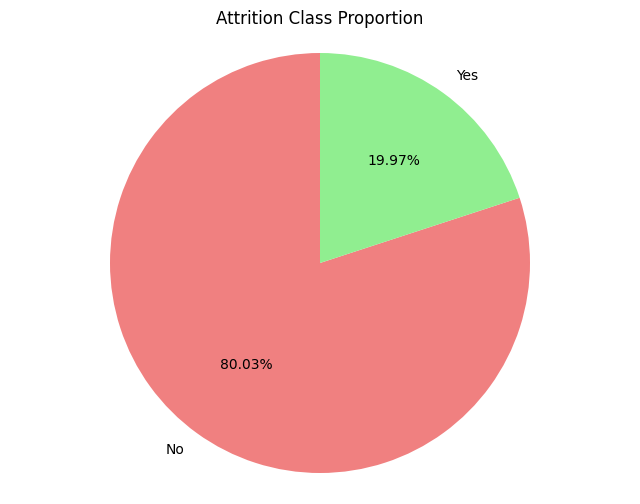


FEATURE CATEGORY SEGREGATION

Categorical Features present in the dataset (6): ['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime', 'Attrition']

Numerical Features present in the dataset (20): ['Employee_ID', 'Age', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating', 'Training_Hours_Last_Year', 'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked']

Binary Features present in the dataset (0): []

STATSTICAL INFORMATION OF THE DATASET

       Employee_ID           Age     Job_Level  Monthly_Income   Hourly_Rate  \
count  10000.00000  10000.000000  10000.000000    10000.000000  10000.000000   
mean    5000.50000     39.561800      2.990800    11436.716700     57.032300   
std     2886.89568     11.4549

In [14]:
#Q1: DATASET ANALYSIS

print(f"\nLoading the dataset into a DF.")
df = pd.read_csv('employee_attrition_dataset.csv')
print(f"\nDataset got loaded successfully: ")
print(df)

print("\nDATASET OVERVIEW")
print(f"\nDataset Shape: {df.shape}")
print(f"\nNo of rows[SAMPLES] present in the dataset: {df.shape[0]:,}")
print(f"\nNumber of columns[FEATURES] present in the dataset: {df.shape[1]}")

print(f"\nDataset is LABELED with target class being  ATTRITION.")

#Feature type
print("\nDATA TYPE OF EACH FEATURE PRESENT IN THE DATASET:")
print(df.dtypes)



# Class distribution
print(f"\nATTRITION CLASS DISTRIBUTION: ")
classDistribution = df['Attrition'].value_counts()
classPercentage = df['Attrition'].value_counts(normalize=True) * 100
classRatio = classDistribution['Yes'] / classDistribution['No']
print(f"\nNO Attrition: {classDistribution['No']:,} samples ({classPercentage['No']:.2f}%)")
print(f"\nYES Attrition: {classDistribution['Yes']:,} samples ({classPercentage['Yes']:.2f}%)")
print(f"\nClass Imbalance Ratio (Minority class/Majority class): {classRatio:.3f}")
#minority/majority class detection
if classRatio < 0.8:
    majorityClass = 0
    minorityClass = 1
    print("YES attrition is the minority class and NO attrition is the majority class.")
elif classRatio > 1.25:
    majorityClass = 1
    minorityClass = 0
    print("NO attrition is the minority and YES attrition is the majority class.")
else:
    print("Both classes are equally balanced")

#class distribution visualisation
# Plot pie chart
labels = list(classDistribution.index)
sizes = list(classDistribution.values)
colors = ['lightcoral', 'lightgreen']
plt.figure(figsize=(8, 6))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Attrition Class Proportion')
plt.axis('equal')
plt.show()

#Feature segregation
print("\nFEATURE CATEGORY SEGREGATION")
categoricalFeatures = []
numericalFeatures = []
binaryFeatures = []

for col in df.columns:
    if df[col].dtype == 'object':
        categoricalFeatures.append(col)
    else:
        if df[col].nunique() == 2:
            binaryFeatures.append(col)
        else:
            numericalFeatures.append(col)

print(f"\nCategorical Features present in the dataset ({len(categoricalFeatures)}): {categoricalFeatures}")
print(f"\nNumerical Features present in the dataset ({len(numericalFeatures)}): {numericalFeatures}")
print(f"\nBinary Features present in the dataset ({len(binaryFeatures)}): {binaryFeatures}")

#Stats of the dataset
print("\nSTATSTICAL INFORMATION OF THE DATASET")
print(f"\n{df.describe()}")

## **Q1 ANALYSIS:**

# 1.   **What dataset did you use? How many samples? Labeled? Unlabeled? Features?**
**Answer:**

*   I have used **`Employee Attrition Prediction Dataset`** from kaggle, [dataset link.](https://www.kaggle.com/datasets/ziya07/employee-attrition-prediction-dataset)
*  The **`employee_attrition_dataset.csv`** contains 10,000 samples and 26 features.
*   The dataset is **`LABELED`** with the target class  **`attrition(yes/no)`**.


# 2.   **What type of data, and what is your data about?**
**Answer:**

*   The data is `tabular(.csv)` and `labeled` for **`supervised classification`**.
*   The data is about a **company's employee HR information**.
*   Each `row` represents `single employee information`, and each` column` represents a `HR feature` like job satisfaction, tenure, department etc.
* The main goal is to predict if an employee leaves the company or not based on the employee response to the HR factors.
# 3.   **If it is labeled, how many samples do you have in minority and majority class of the data?**
**Answer:**
* Yes, The datset is **labeled**.
* **Total samples present in the dataset:** 10,000
* **Majority Class:** `No attrition` with **8,003 samples (80.03%)**.
* **Minority Class:** `Yes attrition` with **1,997 samples (19.97%)**.
* Hence, the dataset exhibits a high degree of `imbalance`.
# 4.   **Provide a brief description of the features, and a link to the data.**
**Answer:**
* The [dataset](https://www.kaggle.com/datasets/ziya07/employee-attrition-prediction-dataset/data) contains `26 features` in total.
* **Employee_ID:** Unique identifier for each employee.
* **Age:** Age of the employee.
* **Gender:** Gender of the employee.
* **Marital_Status:** Marital status of the employee (Single, Married, Divorced).
* **Department:** Department the employee works in (e.g., HR, IT, Sales, Marketing).
* **Job_Role:** Specific role within the department (e.g., Manager, Analyst).
* **Job_Level:** Level in the organizational hierarchy.
* **Monthly_Income:** Monthly salary of the employee.
* **Hourly_Rate:** Rate per hour for hourly employees.
* **Years_at_Company:** Number of years the employee has been with the company.
* **Years_in_Current_Role:** Number of years the employee has been in their current role.
* **Years_Since_Last_Promotion:** Time since the employee’s last promotion.
* **Work_Life_Balance:**  Rating of work-life balance.
* **Job_Satisfaction:**  Rating of job satisfaction (1-5 scale).
* **Performance_Rating:** Performance rating (1-5 scale).
* **Training_Hours_Last_Year:** Number of training hours completed in the past year.
* **Overtime:** Whether the employee works overtime (Yes/No).
* **Project_Count:** Number of projects managed by the employee.
* **Average_Hours_Worked_Per_Week:** Average working hours per week.
* **Absenteeism:** Number of days the employee was absent in the past year.
* **Work_Environment_Satisfaction:** Rating of work environment satisfaction.
* **Relationship_with_Manager:** Rating of the relationship with the manager.
* **Job_Involvement:** Rating of job involvement.
* **Distance_From_Home:** Distance from home to the workplace (in kilometers).
* **Number_of_Companies_Worked:** Total number of companies the employee has worked for.
* **Attrition:** The target column (Yes/No) indicating whether the employee left the company.
# 5.   **Analyze your data, any categorical, ordinal, and etc?**
**Answer:**
* **Numerical features:** Employee_ID, Age, Job_Level, Monthly_Income, Hourly_Rate, Years_at_Company, Years_in_Current_Role, Years_Since_Last_Promotion, Work_Life_Balance, Job_Satisfaction, Performance_Rating, Training_Hours_Last_Year, Project_Count, Average_Hours_Worked_Per_Week, Absenteeism, Work_Environment_Satisfaction, Relationship_with_Manager, Job_Involvement, Distance_From_Home, Number_of_Companies_Worked.
* **Categorical Features:** Gender, Marital_Status, Department, Job_Role, Overtime, Attrition.
* **Categorical(ordinal) Features:** Job_Level, Work_Life_Balance, Job_Satisfaction, Performance_Rating, Work_Environment_Satisfaction, Relationship_with_Manager, Job_Involvement.


